<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 할일
* customer analysis
* iterator

In [26]:
import pandas as pd 
import numpy as np  
from datetime import datetime, date, time, timezone, timedelta
import os 

import plotnine as gg
from plotnine import ggplot, aes

from functools import reduce
from collections import ChainMap, defaultdict, Counter

# customer analysis

In [2]:
os.listdir()

['.config',
 'listings.csv',
 'rfm_test.csv',
 '.Rhistory',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'sample_submission.csv',
 'ecommerce-data.csv',
 'online_retail_II.xlsx',
 'retail_data_transactions.csv',
 'retail_data_response.csv',
 'items.csv',
 'sales_train.csv',
 'shops.csv',
 'item_categories.csv',
 'sample_data']

In [3]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [4]:
df.columns = df.iloc[0]
df = df.drop([0], axis = 0)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [5]:
df = df[df.order_status == 'Approved']
df['date'] = df['transaction_date'].to_numpy().astype('datetime64[D]')
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,date,month
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2017-02-25,2017-02-01
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,2017-05-21,2017-05-01
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,2017-10-16,2017-10-01
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145,2017-08-31,2017-08-01
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226,2017-10-01,2017-10-01


In [9]:
df = df[['customer_id','date', 'month','standard_cost']].rename(columns = {'customer_id':'id', 'standard_cost':'rev'})
df = df.groupby(['id','date','month'])['rev'].sum().reset_index()
df.head()

,id,date,month,rev
0,1,2017-01-05,2017-01-01,270.3
1,1,2017-02-21,2017-02-01,53.62
2,1,2017-03-27,2017-03-01,612.88
3,1,2017-03-29,2017-03-01,764.96
4,1,2017-04-06,2017-04-01,826.51


In [12]:
ret = df.groupby(['id','month'])['rev'].count().reset_index()
ret = ret.assign(rev = np.where(ret.rev != 0, True, False)).sort_values(['id', 'month'])
ret.head()

,id,month,rev
0,1,2017-01-01,True
1,1,2017-02-01,True
2,1,2017-03-01,True
3,1,2017-04-01,True
4,1,2017-05-01,True


In [14]:
list_npu = ret.groupby('id').head(1)
list_npu.head()

,id,month,rev
0,1,2017-01-01,True
7,2,2017-05-01,True
10,3,2017-02-01,True
15,4,2017-04-01,True
17,5,2017-03-01,True


In [20]:
list_mon = list_npu['month'].sort_values().unique()
list_mon

array(['2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [33]:
for mon in list_mon : 

  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = ret[ret['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['month'])['id'].count().reset_index().rename(columns = {'id':'pu'})
  temp = temp.assign(month_npu = mon, 
                     num = temp['month'].rank().astype(int),
                     ratio = lambda x : round(x['pu']/x['pu'].max() * 100, 2)                     
                     )  
  temp = temp.reindex(columns = ['month_npu', 'num', 'pu', 'ratio'])
  if mon == list_mon[0] :
    
    res = temp
    
  else :

    res = pd.concat([res, temp], axis = 0)

res['month_npu'] = res['month_npu'].astype('category')
res.head()
    

,month_npu,num,pu,ratio
0,2017-01-01,1,1347,100.00
1,2017-01-01,2,483,35.86
2,2017-01-01,3,505,37.49
3,2017-01-01,4,499,37.05
4,2017-01-01,5,492,36.53


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


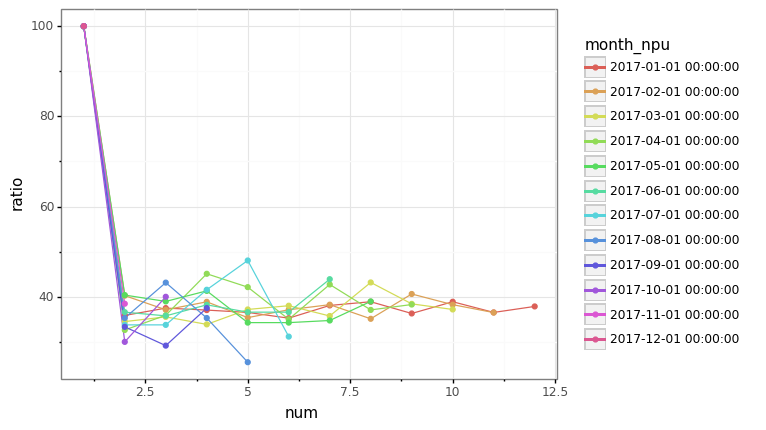

<ggplot: (8733127785265)>

In [35]:
(
    ggplot(res, aes('num', 'ratio', color = 'month_npu')) +
    gg.geom_line() +
    gg.geom_point() +
    gg.theme_bw()
    
)

# iterator

In [36]:
mat = [list('ABC'), list('DEF'), list('GHI')]
mat

[['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I']]

In [37]:
for r, rows in enumerate(mat) :
  for c, letter in enumerate(rows) :
    print(f'({r},{c})-{letter}')

(0,0)-A
(0,1)-B
(0,2)-C
(1,0)-D
(1,1)-E
(1,2)-F
(2,0)-G
(2,1)-H
(2,2)-I


In [38]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'age': 73,
  'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M'},
 {'age': 29,
  'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F'},
 {'age': 51,
  'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M'},
 {'age': 32,
  'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F'},
 {'age': 42, 'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F'}]

In [43]:
for key in list(users[0].keys()) :
  if key == list(users[0].keys())[0] :
    res = eval(f'reduce(lambda acc, cur : acc + [cur["{key}"]], users, [])')
  else :
    res = np.c_[res, eval(f'reduce(lambda acc, cur : acc + [cur["{key}"]], users, [])')]

res

array([['gregorythomas@gmail.com', 'Brett Holland', 'M', '73'],
       ['hintoncynthia@hotmail.com', 'Madison Martinez', 'F', '29'],
       ['wwagner@gmail.com', 'Michael Jenkins', 'M', '51'],
       ['daniel79@gmail.com', 'Karen Rodriguez', 'F', '32'],
       ['ujackson@gmail.com', 'Amber Rhodes', 'F', '42']], dtype='<U25')

In [44]:
portfolio = [
    ('GOOG', 100, 490.1),
    ('IBM', 50, 91.1),
    ('CAT', 150, 83.44),
    ('IBM', 100, 45.23),
    ('GOOG', 75, 572.45),
    ('AA', 50, 23.15)
]
portfolio

[('GOOG', 100, 490.1),
 ('IBM', 50, 91.1),
 ('CAT', 150, 83.44),
 ('IBM', 100, 45.23),
 ('GOOG', 75, 572.45),
 ('AA', 50, 23.15)]

In [45]:
a = Counter()
for com, share, point in portfolio :
  a[com] += share

a

Counter({'AA': 50, 'CAT': 150, 'GOOG': 175, 'IBM': 150})

In [46]:
b = defaultdict(list)
for com, share, point in portfolio :
  b[com].append((share, point))
b

defaultdict(list,
            {'AA': [(50, 23.15)],
             'CAT': [(150, 83.44)],
             'GOOG': [(100, 490.1), (75, 572.45)],
             'IBM': [(50, 91.1), (100, 45.23)]})